#### Import necessary libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Import data

In [2]:
profits_data = pd.read_csv('50_Startups.csv')
profits_data.rename(columns={'R&D Spend':'R_and_D_Spend','Marketing Spend':'Marketing_Spend'}, inplace=True)
profits_data

,R_and_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


#### Data understanding

1. Initial analysis

In [3]:
profits_data.shape

(50, 5)

In [4]:
profits_data.isna().sum()

R_and_D_Spend      0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

In [5]:
profits_data.dtypes

R_and_D_Spend      float64
Administration     float64
Marketing_Spend    float64
State               object
Profit             float64
dtype: object

2. Assumptions check

Test for linearity

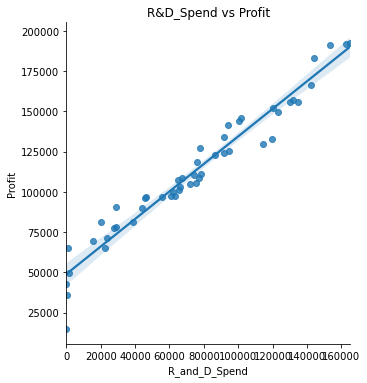

In [6]:
sns.lmplot(x='R_and_D_Spend',y='Profit',data=profits_data)
plt.title('R&D_Spend vs Profit')
plt.show()

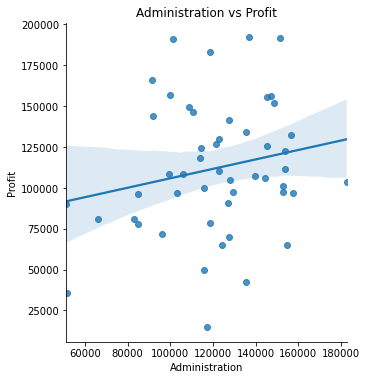

In [7]:
sns.lmplot(x='Administration',y='Profit',data=profits_data)
plt.title('Administration vs Profit')
plt.show()

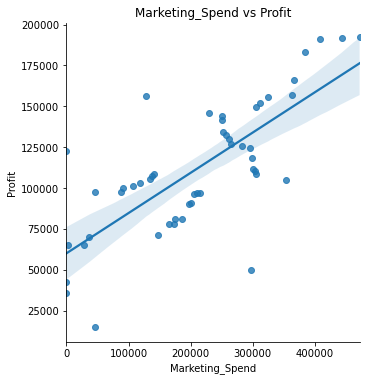

In [8]:
sns.lmplot(x='Marketing_Spend',y='Profit',data=profits_data)
plt.title('Marketing_Spend vs Profit')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

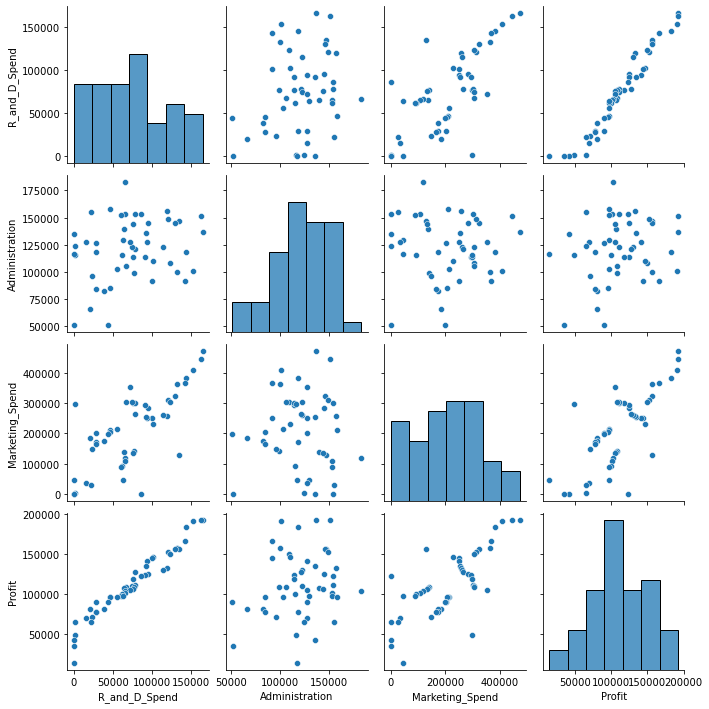

In [9]:
sns.pairplot(data=profits_data)
plt.show

Linearity test us **FAILED**

#### Test of Normality

Using distplot


<function matplotlib.pyplot.show(close=None, block=None)>

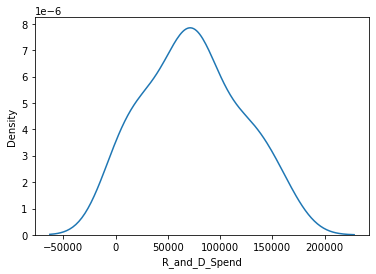

In [10]:
sns.distplot(a=profits_data['R_and_D_Spend'],hist=False)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

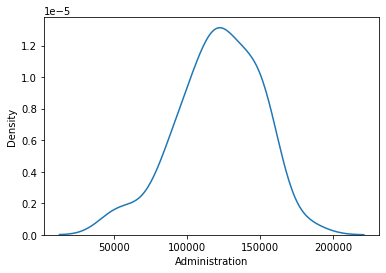

In [11]:
sns.distplot(a=profits_data['Administration'],hist=False)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

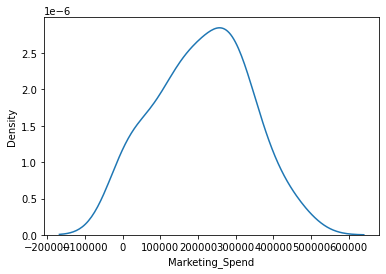

In [12]:
sns.distplot(a=profits_data['Marketing_Spend'],hist=False)
plt.show

Using probplot

In [13]:
from scipy import stats

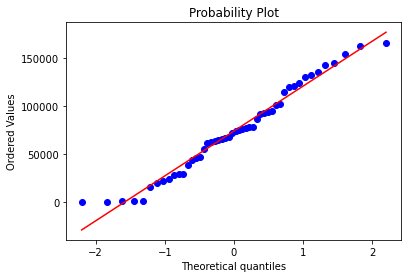

In [14]:
stats.probplot(x=profits_data['R_and_D_Spend'],dist = 'norm',plot = plt)
plt.show()

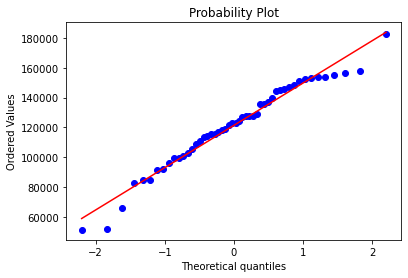

In [15]:
stats.probplot(x=profits_data['Administration'],dist = 'norm',plot = plt)
plt.show()

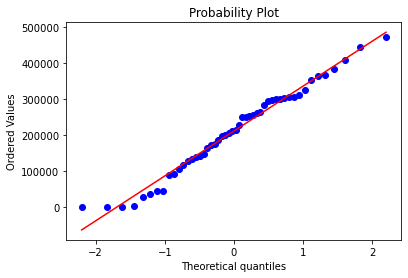

In [16]:
stats.probplot(x=profits_data['Marketing_Spend'],dist = 'norm',plot = plt)
plt.show()

Normality test is **FAILED**

In [17]:
profits_data.skew()

R_and_D_Spend      0.164002
Administration    -0.489025
Marketing_Spend   -0.046472
Profit             0.023291
dtype: float64

In [18]:
profits_data.kurtosis()

R_and_D_Spend     -0.761465
Administration     0.225071
Marketing_Spend   -0.671701
Profit            -0.063859
dtype: float64

#### Multi colinearity

By Correlation Matrix

In [19]:
corr_matrix = profits_data.corr().round(2)
corr_matrix

,R_and_D_Spend,Administration,Marketing_Spend,Profit
R_and_D_Spend,1.00,0.24,0.72,0.97
Administration,0.24,1.00,-0.03,0.20
Marketing_Spend,0.72,-0.03,1.00,0.75
Profit,0.97,0.20,0.75,1.00


<AxesSubplot:>

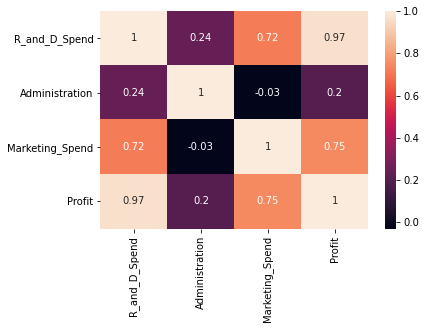

In [20]:
sns.heatmap(data=corr_matrix,annot=True)

Multi colinearity test is **PASSED**

#### Homoscadascity check | Zero residual mean check
1. Can be done post model training

#### Data preparation

In [21]:
del profits_data['State']

In [22]:
profits_data.dtypes

R_and_D_Spend      float64
Administration     float64
Marketing_Spend    float64
Profit             float64
dtype: object

In [23]:
profits_data.isna().sum()

R_and_D_Spend      0
Administration     0
Marketing_Spend    0
Profit             0
dtype: int64

#### Model Building using sklearn library

In [24]:
X = profits_data.drop(labels=['Profit'],axis=1)
y = profits_data[['Profit']]

In [25]:
X

,R_and_D_Spend,Administration,Marketing_Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [26]:
X.mean()

R_and_D_Spend       73721.6156
Administration     121344.6396
Marketing_Spend    211025.0978
dtype: float64

In [27]:
X.std()

R_and_D_Spend       45902.256482
Administration      28017.802755
Marketing_Spend    122290.310726
dtype: float64

In [28]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_X = std_scaler.fit_transform(X)
scaled_X

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01],
       [ 1.03036886e+00,  9.86952101e-01,  8.30886909e-01],
       [ 1.09181921e+00, -4.56640246e-01,  7.76107440e-01],
       [ 6.20398248e-01, -3.87599089e-01,  1.49807267e-01],
       [ 5.93085418e-01, -1.06553960e+00,  3.19833623e-01],
       [ 4.43259872e-01,  2.15449064e-01,  3.20617441e-01],
       [ 4.02077603e-01,  5.10178953e-01,  3.43956788e-01],
       [ 1.01718075e+00,  1.26919939e+00,  3.75742273e-01],
       [ 8.97913123e-01,  4.58678535e-02,  4.19218702e-01],
       [ 9.44411957e-02,  9.11841968e-03

In [29]:
X.head()

,R_and_D_Spend,Administration,Marketing_Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [30]:
scaled_X = pd.DataFrame(data=scaled_X,columns=['R_and_D_Spend','Administration','Marketing_Spend'])
scaled_X                        

,R_and_D_Spend,Administration,Marketing_Spend
0,2.016411,0.560753,2.153943
1,1.955860,1.082807,1.923600
2,1.754364,-0.728257,1.626528
3,1.554784,-0.096365,1.422210
4,1.504937,-1.079919,1.281528
5,1.279800,-0.776239,1.254210
6,1.340066,0.932147,-0.688150
7,1.245057,0.871980,0.932186
8,1.030369,0.986952,0.830887
9,1.091819,-0.456640,0.776107


In [31]:
scaled_X.mean()

R_and_D_Spend      1.199041e-16
Administration    -2.919887e-16
Marketing_Spend   -9.325873e-17
dtype: float64

In [32]:
scaled_X.std()

R_and_D_Spend      1.010153
Administration     1.010153
Marketing_Spend    1.010153
dtype: float64

#### Model training

In [33]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(scaled_X,y)

LinearRegression()

In [34]:
linear_model.coef_

array([[36612.42955071,  -743.7733214 ,  3296.26304751]])

In [35]:
linear_model.intercept_

array([112012.6392])

#### Model Testing

In [36]:
y_pred = linear_model.predict(scaled_X)
y_pred

array([[192521.25289008],
       [189156.76823226],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327],
       [163580.7805712 ],
       [158114.09666865],
       [160021.36304781],
       [151741.69969865],
       [154884.68410995],
       [135509.01636714],
       [135573.71296074],
       [129138.05418243],
       [127487.99166275],
       [149548.64633453],
       [146235.1599852 ],
       [116915.40540144],
       [130192.44720781],
       [129014.2268059 ],
       [115635.21636716],
       [116639.6692309 ],
       [117319.45164029],
       [114706.98171695],
       [109996.61522126],
       [113362.96611314],
       [102237.72506481],
       [110600.5753503 ],
       [114408.07145684],
       [101660.02600497],
       [101794.98345176],
       [ 99452.37293606],
       [ 97687.85627575],
       [ 99001.32898549],
       [ 97915.00780465],
       [ 89039.27374116],
       [ 90511.59956753],
       [ 75286.17458546],
       [ 89619.5377079 ],
       [ 696

#### Model evaluation

In [37]:
error = y - y_pred

In [38]:
error.mean()

Profit   -1.688022e-11
dtype: float64

#### Homoscedascticity

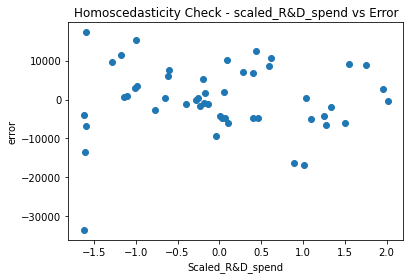

In [39]:
plt.scatter(x=scaled_X['R_and_D_Spend'],y=error)
plt.title('Homoscedasticity Check - scaled_R&D_spend vs Error')
plt.xlabel('Scaled_R&D_spend')
plt.ylabel('error')
plt.show()

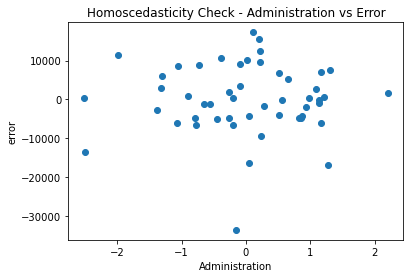

In [40]:
plt.scatter(x=scaled_X['Administration'],y=error)
plt.title('Homoscedasticity Check - Administration vs Error')
plt.xlabel('Administration')
plt.ylabel('error')
plt.show()

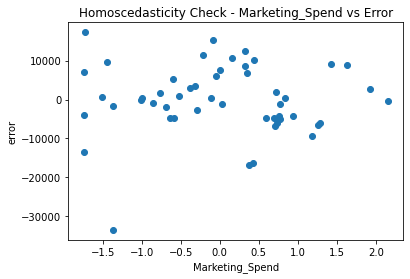

In [41]:
plt.scatter(x=scaled_X['Marketing_Spend'],y=error)
plt.title('Homoscedasticity Check - Marketing_Spend vs Error')
plt.xlabel('Marketing_Spend')
plt.ylabel('error')
plt.show()

Homoscedasticity test is **FAILED**

#### Zero residual mean

In [42]:
y

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


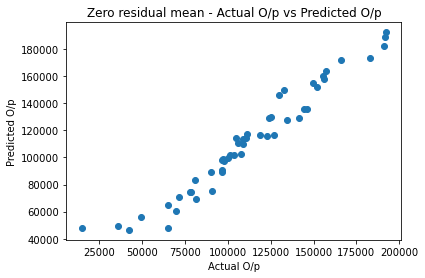

In [43]:
plt.scatter(x=y,y=y_pred)
plt.title('Zero residual mean - Actual O/p vs Predicted O/p')
plt.xlabel('Actual O/p')
plt.ylabel('Predicted O/p')
plt.show()

In [44]:
error.mean()

Profit   -1.688022e-11
dtype: float64

Zero residual mean is **PASSED**

#### Using statsmodel for linear regression

In [45]:
profits_data.head()

,R_and_D_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [46]:
X = profits_data.drop(labels='Profit',axis=1)

In [47]:
import statsmodels.formula.api as smf
lin_model_1 = smf.ols(formula= 'Profit ~  R_and_D_Spend + Administration + Marketing_Spend',data=profits_data).fit()

In [48]:
y_pred = lin_model_1.predict(X)

#### Understanding evaluation metrix of regression

In [49]:
lin_model_1.params

Intercept          50122.192990
R_and_D_Spend          0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [50]:
lin_model_1.pvalues

Intercept          1.057379e-09
R_and_D_Spend      2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64

### Hypothesis formulation

In [51]:
print('R2 score          : ', round(lin_model_1.rsquared,5))
print('Adjusted R2 score : ', round(lin_model_1.rsquared_adj,5))
print('AIC               : ', round(lin_model_1.aic,4))
print('BIC               : ', round(lin_model_1.bic,4))

R2 score          :  0.95075
Adjusted R2 score :  0.94753
AIC               :  1058.7715
BIC               :  1066.4196


In [52]:
import statsmodels.formula.api as smf
model_1 = smf.ols(formula= 'Profit ~  R_and_D_Spend ',data=profits_data).fit()

In [53]:
print('R2 score          : ', round(model_1.rsquared,5))
print('Adjusted R2 score : ', round(model_1.rsquared_adj,5))
print('AIC               : ', round(model_1.aic,4))
print('BIC               : ', round(model_1.bic,4))

R2 score          :  0.94654
Adjusted R2 score :  0.94542
AIC               :  1058.873
BIC               :  1062.6971


In [54]:
model_2 = smf.ols(formula= 'Profit ~  R_and_D_Spend + Administration ',data=profits_data).fit()

In [55]:
print('R2 score          : ', round(model_2.rsquared,5))
print('Adjusted R2 score : ', round(model_2.rsquared_adj,5))
print('AIC               : ', round(model_2.aic,4))
print('BIC               : ', round(model_2.bic,4))

R2 score          :  0.94781
Adjusted R2 score :  0.94559
AIC               :  1059.6637
BIC               :  1065.3998


In [56]:
model_3 = smf.ols(formula= 'Profit ~  R_and_D_Spend + Administration + Marketing_Spend ',data=profits_data).fit()

In [57]:
print('R2 score          : ', round(model_3.rsquared,5))
print('Adjusted R2 score : ', round(model_3.rsquared_adj,5))
print('AIC               : ', round(model_3.aic,4))
print('BIC               : ', round(model_3.bic,4))

R2 score          :  0.95075
Adjusted R2 score :  0.94753
AIC               :  1058.7715
BIC               :  1066.4196


#### Understanding p-val

In [58]:
model_4 = smf.ols(formula= 'Profit ~  R_and_D_Spend ',data=profits_data).fit()
model_4.pvalues

Intercept        2.782697e-24
R_and_D_Spend    3.500322e-32
dtype: float64

In [59]:
model_5 = smf.ols(formula= 'Profit ~  Administration',data=profits_data).fit()
model_5.pvalues

Intercept         0.003824
Administration    0.162217
dtype: float64

In [60]:
model_6 = smf.ols(formula= 'Profit ~  Marketing_Spend',data=profits_data).fit()
model_6.pvalues

Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64

In [61]:
model_7 = smf.ols(formula= 'Profit ~  R_and_D_Spend + Marketing_Spend',data=profits_data).fit()
model_7.pvalues

Intercept          3.504062e-22
R_and_D_Spend      6.040433e-24
Marketing_Spend    6.003040e-02
dtype: float64

#### Build using sklearn library

In [62]:
X = profits_data.drop(labels='Administration',axis=1)
X

,R_and_D_Spend,Marketing_Spend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94
5,131876.90,362861.36,156991.12
6,134615.46,127716.82,156122.51
7,130298.13,323876.68,155752.60
8,120542.52,311613.29,152211.77
9,123334.88,304981.62,149759.96


In [63]:
y = profits_data[['Profit']]
y

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [64]:
X.shape,y.shape

((50, 3), (50, 1))

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12)

In [66]:
X_train.shape,y_train.shape

((40, 3), (40, 1))

In [67]:
X_test.shape,y_test.shape

((10, 3), (10, 1))

In [68]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

#### Model  Testing

In [69]:
y_pred_train = lin_model.predict(X_train)

In [70]:
y_pred_test = lin_model.predict(X_test)

#### Model Evaluation

In [71]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [72]:
mean_squared_error(y_train,y_pred_train)

5.111976185577711e-22

In [73]:
mean_squared_error(y_test,y_pred_test)

8.099752558119247e-22

In [74]:
mean_absolute_error(y_train,y_pred_train)

1.864464138634503e-11

In [75]:
mean_absolute_error(y_test,y_pred_test)

2.546585164964199e-11